In [4]:
import pymysql.cursors
import pandas
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import datetime
plt.style.use("fivethirtyeight")
# %matplotlib notebook
%matplotlib inline


my_file_name = "..\..\DATA\\center_sternum.txt"
df_stern_data = pd.read_csv(my_file_name, encoding="ANSI", sep="\t")
df_stern_data

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


In [5]:

delta_time = 1/200
current_time = 0
times = []
for index in range(len(df_stern_data)):
    times.append(current_time)
    current_time += delta_time
#print(times)
df_stern_data["time"] = times
#print(df_stern_data)
df_stern_data.time = df_stern_data.time.astype(float).round(4)
print(df_stern_data)

       Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX  MagnY  MagnZ        qw      

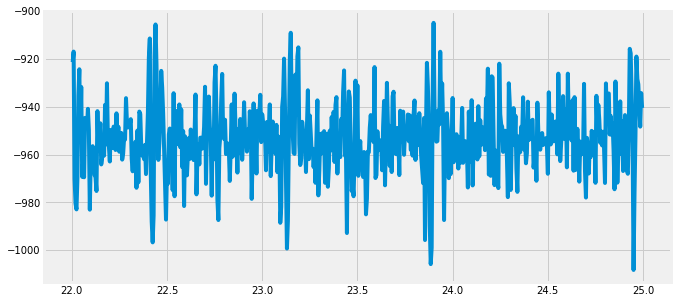

In [6]:
df_clean_stern_data = df_stern_data[(df_stern_data.time > 22) & (df_stern_data.time < 25)]
fig = plt.figure(figsize=(10,5))
plt.plot(df_clean_stern_data["time"],df_clean_stern_data["AccZ"])

plt.show()



In [7]:
from scipy.signal import butter, filtfilt

In [8]:
!pip install scipy

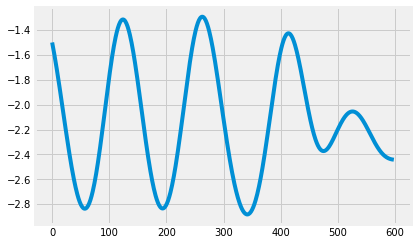

In [9]:
b, a = butter(4,2,"lowpass",fs=200)
result =filtfilt(b,a,df_clean_stern_data['GyroX'])

plt.plot(result)

<bound method NDFrame.head of        Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX

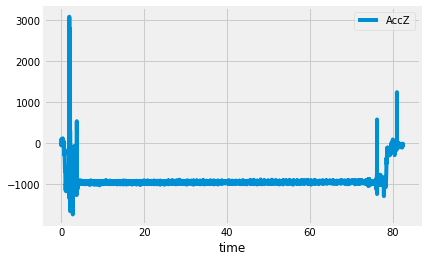

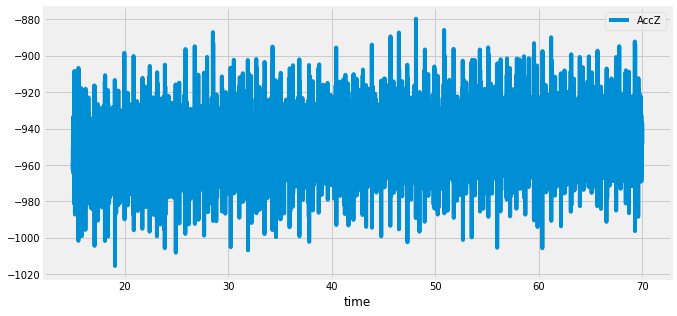

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

file_name = "..\..\DATA\\center_sternum.txt"
df_stern_data = pd.read_csv(file_name, sep="\t")
print(df_stern_data.head)

delta_time = 1/200
current_time = 0
times = []
for index in range(len(df_stern_data)):
    times.append(current_time)
    current_time += delta_time
#print(times)
df_stern_data["time"] = times
#print(df_stern_data)
df_stern_data.time = df_stern_data.time.astype(float).round(4)
print(df_stern_data.columns)

df_stern_data.plot(x="time", y="AccZ")
plt.show()
df_clean_stern_data = df_stern_data[(df_stern_data.time > 15) & (df_stern_data.time < 70)]
df_clean_stern_data.plot(x="time", y="AccZ", figsize=(10,5))
plt.show()

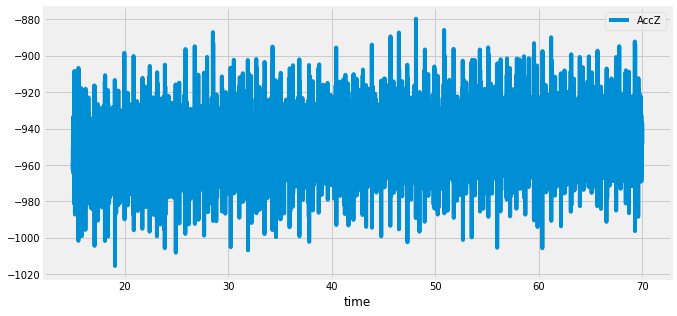

In [12]:
df_clean_stern_data.plot(x="time", y="AccZ", figsize=(10,5))
plt.show()

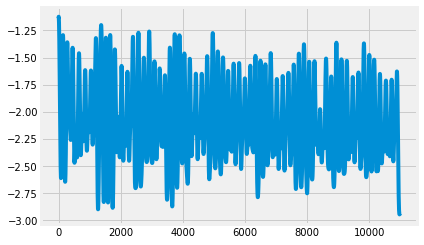

(array([    5,   144,   281,   453,   556,   659,   762,   857,   956,
        1043,  1203,  1372,  1524,  1663,  1813,  1921,  2029,  2127,
        2217,  2318,  2395,  2572,  2747,  2918,  3088,  3255,  3343,
        3425,  3584,  3740,  3892,  4050,  4226,  4331,  4420,  4522,
        4609,  4710,  4784,  4964,  5128,  5294,  5459,  5546,  5636,
        5813,  5927,  5998,  6094,  6172,  6337,  6501,  6658,  6830,
        6932,  7026,  7129,  7216,  7324,  7399,  7571,  7736,  7900,
        8068,  8239,  8328,  8419,  8517,  8611,  8778,  8944,  9106,
        9280,  9380,  9471,  9573,  9655,  9830, 10003, 10160, 10256,
       10346, 10446, 10538, 10630, 10722, 10826, 10893], dtype=int64), {})


In [13]:
b, a = signal.butter(4,2,"lowpass",fs=200)  
result = signal.filtfilt(b,a,df_clean_stern_data['GyroX'])
df_clean = pd.DataFrame(result)
plt.plot(result)

plt.show()

peaks = signal.find_peaks(result)
print(peaks)

In [14]:
df_clean_stern_data = df_clean_stern_data.reset_index()
MAX_LENGHT = 200*3
data_buffer = []
buffer_index = 0

for data_index in range(df_clean_stern_data.shape[0]):
    buffer_index = data_index % MAX_LENGHT
    if data_index < MAX_LENGHT:
        data_buffer.append(df_clean_stern_data.loc[data_index, "GyroX"])
    else:
        if data_index % MAX_LENGHT == 0:
            peaks, _ = signal.find_peaks(data_buffer, -2, distance=100)
            diff = peaks[1:len(peaks)] - peaks[0:len(peaks)- 1]
            diff = 200/diff.mean()*60
            print(diff)
        data_buffer[buffer_index] = df_clean_stern_data.loc[data_index, "GyroX"]

84.50704225352112
64.63195691202873
111.52416356877323
69.36416184971098
83.47826086956522
72.58064516129032
74.22680412371135
73.02231237322515
84.50704225352112
67.0391061452514
96.0
65.45454545454545
78.43137254901961
69.49806949806951
79.47019867549669
70.3125
70.17543859649122
73.46938775510205


In [18]:
my_file_name = "..\..\DATA\\Marcato_04-05-2022.txt" 
df_dito_dati = pd.read_csv(my_file_name,encoding="ANSI", sep="	")
df_dito_dati

,Timestamp,Acc.X,Acc.Y,Acc.Z,Gyro.X,Gyro.Y,Gyro.Z,Magn.X,Magn.Y,Magn.Z,...,P.9,P.10,P.11,P.12,P.13,P.14,P.15,PPG_RED.,PPG_IR.,PPG_GREEN.
0,1651653923106,-792.512,-58.072,524.600,-35.98,8.26,28.14,-106.5,-174.0,-745.5,...,0,0,0,0,0,0,0,0,0,0
1,1651653923111,-792.024,-129.320,656.360,9.73,1.82,-2.31,879.0,276.0,-355.5,...,0,0,0,0,0,0,0,0,0,0
2,1651653923116,-747.616,-287.432,747.128,9.24,7.98,11.20,879.0,276.0,-355.5,...,0,0,0,0,0,0,0,0,0,0
3,1651653923121,-722.240,-290.848,799.832,62.51,39.41,21.91,339.0,36.0,-435.0,...,0,0,0,0,0,0,0,0,0,0
4,1651653923126,-774.944,-342.088,886.208,0.70,0.49,6.16,339.0,36.0,-435.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,1651653931971,-500.200,-152.256,794.952,20.02,-1.19,7.07,255.0,33.0,-537.0,...,0,0,0,0,0,0,0,0,0,0
1816,1651653931976,-510.448,-145.424,794.464,17.64,-2.52,7.00,255.0,28.5,-534.0,...,0,0,0,0,0,0,0,0,0,0
1817,1651653931981,-514.840,-144.448,807.640,15.05,-4.62,6.23,255.0,28.5,-534.0,...,0,0,0,0,0,0,0,0,0,0
1818,1651653931986,-511.424,-148.352,813.984,13.09,-6.58,5.74,253.5,30.0,-540.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#introduzione: dire il perchè serve, smentire i dibattiti che ci sono in merito all'argomento, citare fonti e mettere il link a fine pagina
#risultati : hr hrv 
#conclusioni : ciò che ci sarebbe da fare per migliorare il lavoro